# Data Understanding

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean

In [2]:
# Creating a DataFrame from a CSV file
transport = pd.read_csv('dataset.csv')

#Take a quick look at the data such as using head, describe, info
print(transport.head())
print(transport.info())
print(transport.describe())

                              ID  travel_fee             departure_time  \
0  2013-07-02 19:54:00.000000232         7.0  2013-07-02 19:54:00+00:00   
1    2013-09-28 00:21:31.0000002         5.5  2013-09-28 00:21:31+00:00   
2  2013-06-16 03:18:00.000000150        21.5  2013-06-16 03:18:00+00:00   
3  2013-07-20 13:43:00.000000121         9.5  2013-07-20 13:43:00+00:00   
4    2013-11-05 22:57:17.0000003        15.5  2013-11-05 22:57:17+00:00   

   departure_long  departure_lat  arrival_long  arrival_lat  occupancy  
0      -74.005360      40.728867    -74.008913    40.710907          1  
1      -74.014165      40.708941    -74.016310    40.716734          1  
2      -73.991075      40.760352    -73.941382    40.713292          1  
3      -74.002662      40.723630    -73.991722    40.748905          5  
4      -73.962397      40.712705    -73.996834    40.680403          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596558 entries, 0 to 2596557
Data columns (total 8 columns):

In [3]:
# Exploring categorical variables
categorical_columns = ['ID','departure_time']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(transport[column].unique())
    print("Value counts:")
    print(transport[column].value_counts())

# Analyzing numerical variables
numerical_columns = ['travel_fee','departure_long',"departure_lat",'arrival_long','arrival_lat', 'occupancy']

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", transport[column].min())
    print("Maximum:", transport[column].max())
    print("Mean:", transport[column].mean())
    print("Standard deviation:", transport[column].std())


Unique values in ID
['2013-07-02 19:54:00.000000232' '2013-09-28 00:21:31.0000002'
 '2013-06-16 03:18:00.000000150' ... '2013-05-25 14:48:39.0000002'
 '2013-12-22 20:45:19.0000001' '2013-07-17 18:57:14.0000003']
Value counts:
2013-07-02 19:54:00.000000232    1
2013-12-17 07:31:00.00000095     1
2013-03-03 22:16:00.00000070     1
2013-01-01 11:16:16.0000001      1
2013-08-07 23:54:40.0000002      1
                                ..
2013-06-22 12:05:00.00000049     1
2013-03-20 12:42:00.000000144    1
2013-05-14 00:54:28.0000002      1
2013-12-16 19:45:00.00000087     1
2013-07-17 18:57:14.0000003      1
Name: ID, Length: 2596558, dtype: int64

Unique values in departure_time
['2013-07-02 19:54:00+00:00' '2013-09-28 00:21:31+00:00'
 '2013-06-16 03:18:00+00:00' ... '2013-04-17 10:34:24+00:00'
 '2013-05-25 14:48:39+00:00' '2013-12-22 20:45:19+00:00']
Value counts:
2013-07-24 18:55:00+00:00    22
2013-04-26 22:04:00+00:00    22
2013-03-21 22:01:00+00:00    22
2013-05-03 10:47:00+00:00    

### Visualization

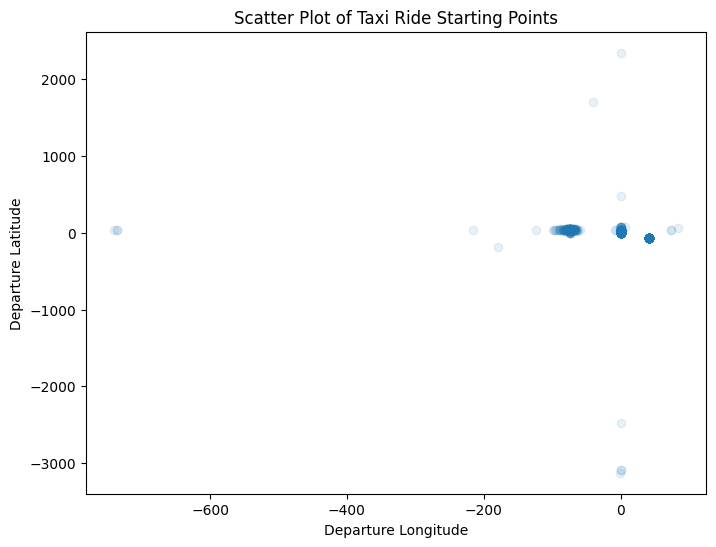

In [4]:
#Diagram 1 Departure longtitude and longtitude
plt.figure(figsize=(8, 6))
plt.scatter(transport['departure_long'], transport['departure_lat'] , alpha=0.1)
plt.xlabel('Departure Longitude')
plt.ylabel('Departure Latitude')
plt.title('Scatter Plot of Taxi Ride Starting Points')
plt.show()

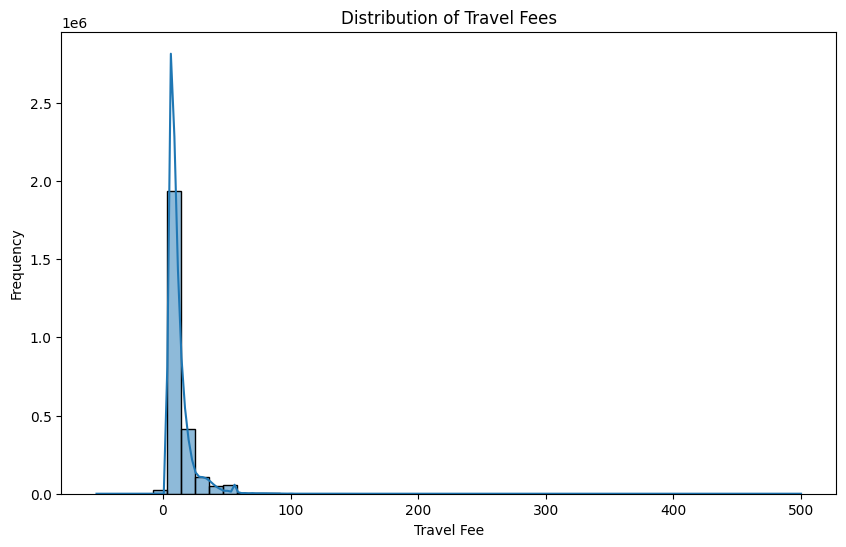

In [5]:
# Diagram 2 Distribution of travel fees
plt.figure(figsize=(10, 6))
sns.histplot(transport['travel_fee'], kde=True, bins=50)
plt.xlabel('Travel Fee')
plt.ylabel('Frequency')
plt.title('Distribution of Travel Fees')
plt.show()


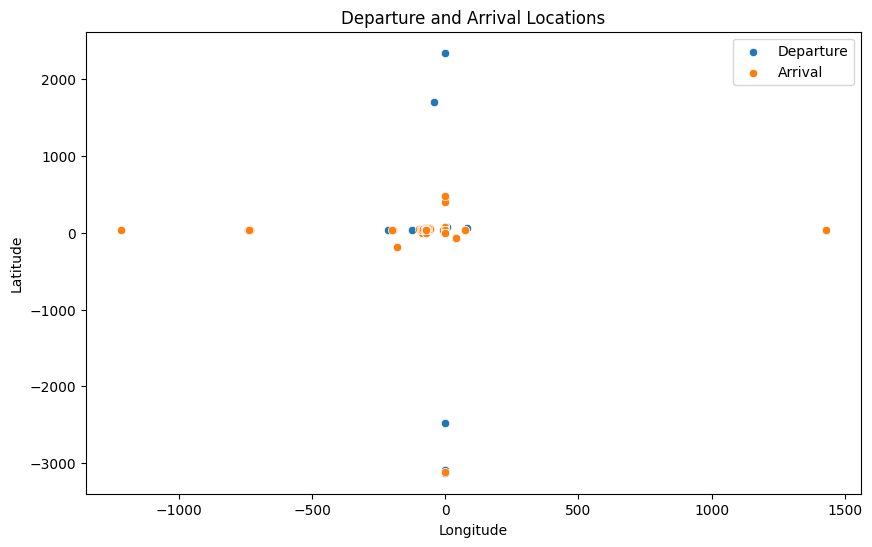

In [6]:
#Diagram 3 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transport, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=transport, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

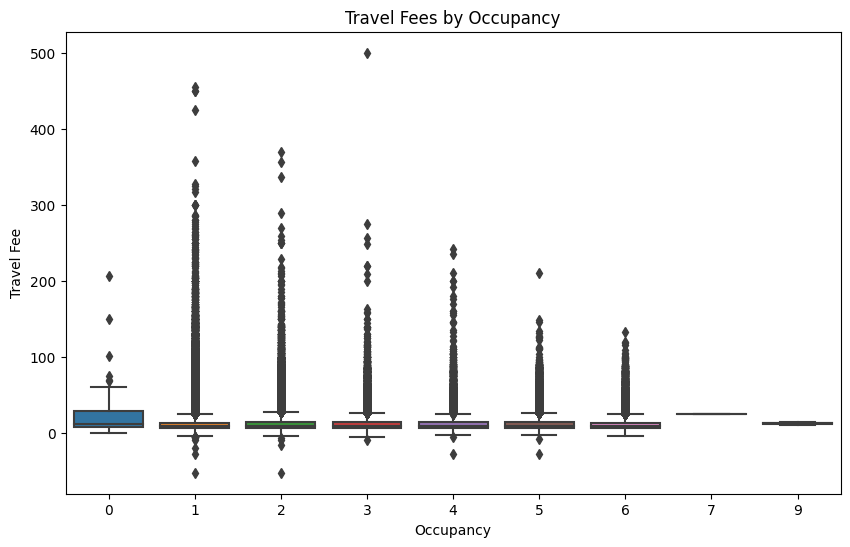

In [7]:
# Diagram 4 Boxplot of travel fees by occupancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=transport, x='occupancy', y='travel_fee')
plt.title('Travel Fees by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Travel Fee')
plt.show()

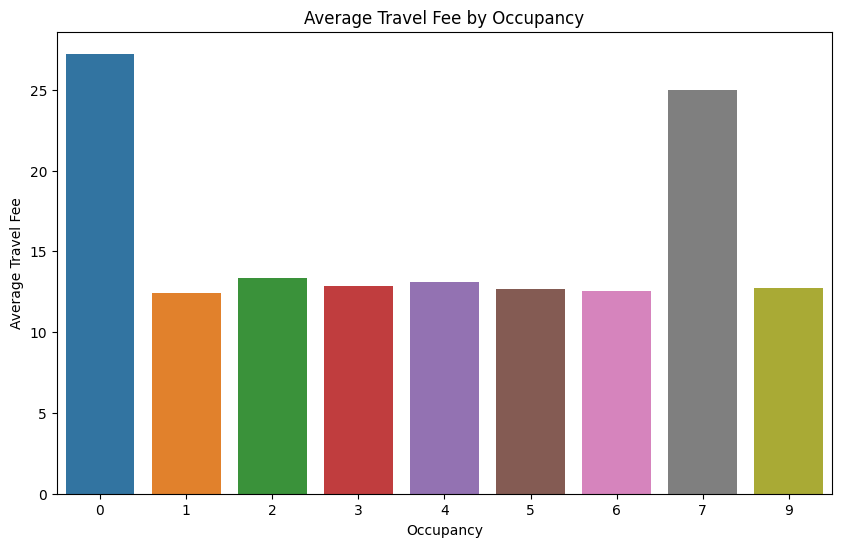

In [8]:
# Diagram 5 Average travel fee by occupancy
avg_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

### Correlation

In [9]:
corr_matrix = transport.corr(numeric_only=True)
corr_matrix

,travel_fee,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
travel_fee,1.000000,0.019136,-0.014231,0.020735,-0.016891,0.011607
departure_long,0.019136,1.000000,-0.851949,0.953584,-0.902377,0.002792
departure_lat,-0.014231,-0.851949,1.000000,-0.821568,0.850146,-0.007591
arrival_long,0.020735,0.953584,-0.821568,1.000000,-0.921675,0.002815
arrival_lat,-0.016891,-0.902377,0.850146,-0.921675,1.000000,-0.008074
occupancy,0.011607,0.002792,-0.007591,0.002815,-0.008074,1.000000


<Axes: >

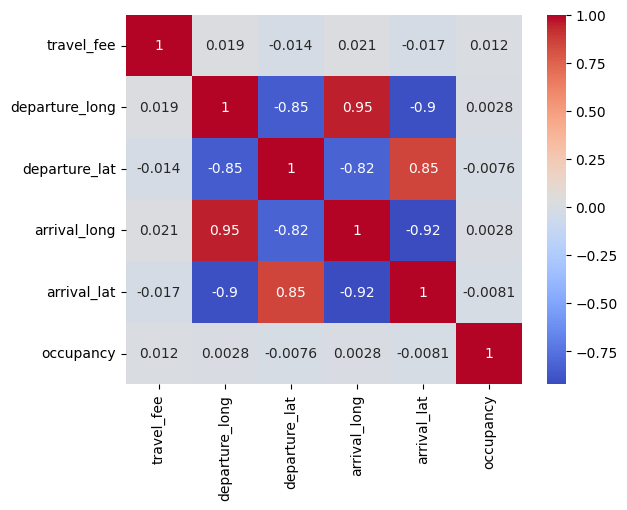

In [10]:
corr_matrix = transport[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Query Date

In [11]:
# 1. Query to find the average travel fee:
average_travel_fee = transport['travel_fee'].mean()
print("Average Travel Fee:", average_travel_fee)

Average Travel Fee: 12.59550563091601


In [12]:
# 2. Query to find the most common departure hour:
transport['departure_hour'] = pd.to_datetime(transport['departure_time']).dt.hour
most_common_departure_hour = transport['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19


In [13]:
# Query 3: Travel Fee Range
min_travel_fee = transport['travel_fee'].min()
max_travel_fee = transport['travel_fee'].max()
print("Travel Fee Range: {} - {}".format(min_travel_fee, max_travel_fee))

Travel Fee Range: -52.0 - 500.0


In [14]:
# Query 4: Average Travel Fee by Occupancy
average_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
0    27.232121
1    12.414574
2    13.329285
3    12.883876
4    13.126220
5    12.691388
6    12.563892
7    25.000000
9    12.750000
Name: travel_fee, dtype: float64


In [15]:
# Query 5: Average Travel Fee by Hour
transport['departure_time'] = pd.to_datetime(transport['departure_time'])
transport['hour'] = transport['departure_time'].dt.hour
average_fee_by_hour = transport.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0     12.974693
1     12.636056
2     12.587342
3     13.063916
4     15.163880
5     17.127870
6     13.193848
7     12.173393
8     12.151249
9     12.091410
10    12.207936
11    12.383107
12    12.457749
13    12.986697
14    13.303791
15    13.411488
16    13.323480
17    12.847730
18    12.102777
19    11.642705
20    11.811337
21    12.184420
22    12.469038
23    12.869821
Name: travel_fee, dtype: float64


In [16]:
# Query 6: Busiest Departure Locations
most_common_departures = transport.groupby(['departure_lat', 'departure_long']).size().nlargest(5)
print("Busiest Departure Locations:")
print(most_common_departures)

Busiest Departure Locations:
departure_lat  departure_long
0.000000        0.000000         41154
40.744844      -73.948726          111
40.765990      -74.023050           91
40.744916      -73.949047           82
40.736054      -73.990946           38
dtype: int64


In [17]:
# Query 7: Popular Travel Routes
popular_routes = transport.groupby(['departure_lat', 'departure_long', 'arrival_lat', 'arrival_long']).size().nlargest(5)
print("Popular Travel Routes:")
print(popular_routes)

Popular Travel Routes:
departure_lat  departure_long  arrival_lat  arrival_long
0.000000        0.000000       0.000000      0.000000       39789
40.744844      -73.948726      40.744844    -73.948726        111
40.765990      -74.023050      40.765990    -74.023050         91
40.744916      -73.949047      40.744916    -73.949047         82
40.736054      -73.990946      40.736054    -73.990946         38
dtype: int64


# Data Preprocessing

In [18]:
sample_size = min(1000000, len(transport))
transport = transport.sample(n=sample_size)


travelfee_train, travelfee_test = train_test_split(transport, test_size=0.2, random_state=42)

print("Length of travelfee_train:", len(travelfee_train))
print("Length of travelfee_test:", len(travelfee_test))

Length of travelfee_train: 800000
Length of travelfee_test: 200000


In [19]:
#check is there any data is null value
travelfee_train.isnull().sum()

ID                 0
travel_fee         0
departure_time     0
departure_long     0
departure_lat      0
arrival_long      13
arrival_lat       13
occupancy          0
departure_hour     0
hour               0
dtype: int64

In [20]:
#handling missing value
travelfee_train["departure_long"].fillna(travelfee_train["departure_long"].mean(), inplace=True)
travelfee_train["departure_lat"].fillna(travelfee_train["departure_lat"].mean(), inplace=True)
travelfee_train["occupancy"].fillna(travelfee_train["occupancy"].mode()[0], inplace=True)
travelfee_train.drop(columns=['ID'], inplace=True)

# Drop rows with missing "departure_time","arrival_long" and "arrival_lat"
travelfee_train.dropna(subset=["departure_time", "arrival_long", "arrival_lat"],inplace = True)
travelfee_train.isnull().sum()

# Drop rows with a 0 value of occupancy
travelfee_train = travelfee_train.drop(travelfee_train[travelfee_train['occupancy'] <= 0].index)

# Handling Outliers
# Select columns for numeric attributes
num_attribs = ['departure_long', 'departure_lat', 'arrival_long', 'arrival_lat', 'occupancy', 'travel_fee']

# Remove outliers using Z-score method
z_scores = np.abs((travelfee_train[num_attribs] - travelfee_train[num_attribs].mean()) / travelfee_train[num_attribs].std())
travelfee_train = travelfee_train[(z_scores < 3).all(axis=1)]
travelfee_train.info()
travelfee_train

# Filter out rows with 0 values in departure_long, departure_lat, arrival_long, and arrival_lat
travelfee_train = travelfee_train[
    (travelfee_train["departure_long"] != 0) &
    (travelfee_train["departure_lat"] != 0) &
    (travelfee_train["arrival_long"] != 0) &
    (travelfee_train["arrival_lat"] != 0)
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732972 entries, 1834906 to 442993
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   travel_fee      732972 non-null  float64            
 1   departure_time  732972 non-null  datetime64[ns, UTC]
 2   departure_long  732972 non-null  float64            
 3   departure_lat   732972 non-null  float64            
 4   arrival_long    732972 non-null  float64            
 5   arrival_lat     732972 non-null  float64            
 6   occupancy       732972 non-null  int64              
 7   departure_hour  732972 non-null  int64              
 8   hour            732972 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(3)
memory usage: 55.9 MB


In [21]:
# Convert departure_time to datetime
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])

# Extract features from departure_time
travelfee_train['hour_of_day'] = travelfee_train['departure_time'].dt.hour
travelfee_train['day_of_week'] = travelfee_train['departure_time'].dt.dayofweek

# Calculate Euclidean distance between departure and arrival locations
travelfee_train['distance'] = travelfee_train.apply(lambda row: euclidean((row['departure_lat'], row['departure_long']),
                                                             (row['arrival_lat'], row['arrival_long'])), axis=1)


In [22]:
travelfee_train.info()
travelfee_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732972 entries, 1834906 to 442993
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   travel_fee      732972 non-null  float64            
 1   departure_time  732972 non-null  datetime64[ns, UTC]
 2   departure_long  732972 non-null  float64            
 3   departure_lat   732972 non-null  float64            
 4   arrival_long    732972 non-null  float64            
 5   arrival_lat     732972 non-null  float64            
 6   occupancy       732972 non-null  int64              
 7   departure_hour  732972 non-null  int64              
 8   hour            732972 non-null  int64              
 9   hour_of_day     732972 non-null  int64              
 10  day_of_week     732972 non-null  int64              
 11  distance        732972 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(5)
memory usage: 72.7

,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy,departure_hour,hour,hour_of_day,day_of_week,distance
1834906,8.5,2013-01-30 15:10:00+00:00,-73.978292,40.783157,-73.956400,40.805712,1,15,15,15,2,0.031432
285395,11.0,2013-05-11 16:20:52+00:00,-74.002310,40.728219,-73.974289,40.743226,1,16,16,16,5,0.031787
1257423,7.0,2013-12-26 10:10:29+00:00,-73.998970,40.761668,-73.987096,40.763150,1,10,10,10,3,0.011966
1661887,5.5,2013-06-21 07:32:07+00:00,-73.977039,40.756082,-73.980115,40.760460,1,7,7,7,4,0.005351
128764,12.0,2013-09-07 23:36:00+00:00,-73.965067,40.759755,-73.988952,40.726912,1,23,23,23,5,0.040610


In [23]:
travelfee = travelfee_train[['hour_of_day', 'day_of_week','occupancy','distance']]
travelfee_labels = travelfee_train["travel_fee"].copy()
x1_train, x1_test, y1_train, y1_test = train_test_split(travelfee, travelfee_labels, test_size=0.2, random_state=42)

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = [ 'hour_of_day', 'day_of_week','occupancy','distance' ]

num_pipeline = make_pipeline(
    StandardScaler()  # Scale features
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    # Apply numeric pipeline to numeric attributes
])

In [25]:
transport_prepared = preprocessing.fit_transform(travelfee)
transport_prepared

array([[ 0.22686663, -0.53119227, -0.48914968,  0.00616617],
       [ 0.37927086,  1.00075526, -0.48914968,  0.01072866],
       [-0.53515453, -0.02054309, -0.48914968, -0.24450461],
       ...,
       [-0.99236722, -1.55249062,  2.26319316, -0.06491379],
       [ 0.98888778, -0.53119227,  0.42829793, -0.27957182],
       [-0.07794184,  1.00075526, -0.48914968, -0.15012208]])

In [26]:
preprocessing.get_feature_names_out()

array(['num__hour_of_day', 'num__day_of_week', 'num__occupancy',
       'num__distance'], dtype=object)

### Visualisation and Query after Data Preprocessing

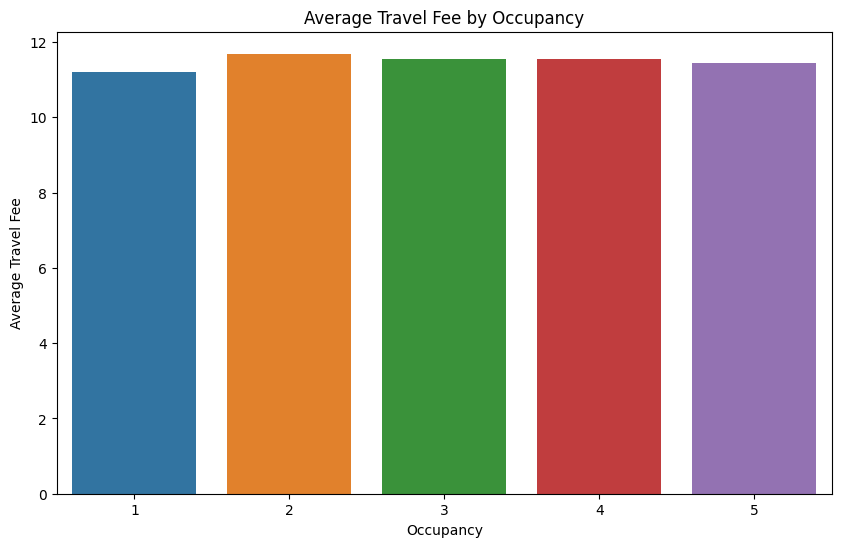

In [27]:
# Diagram 1 Average travel fee by occupancy
avg_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

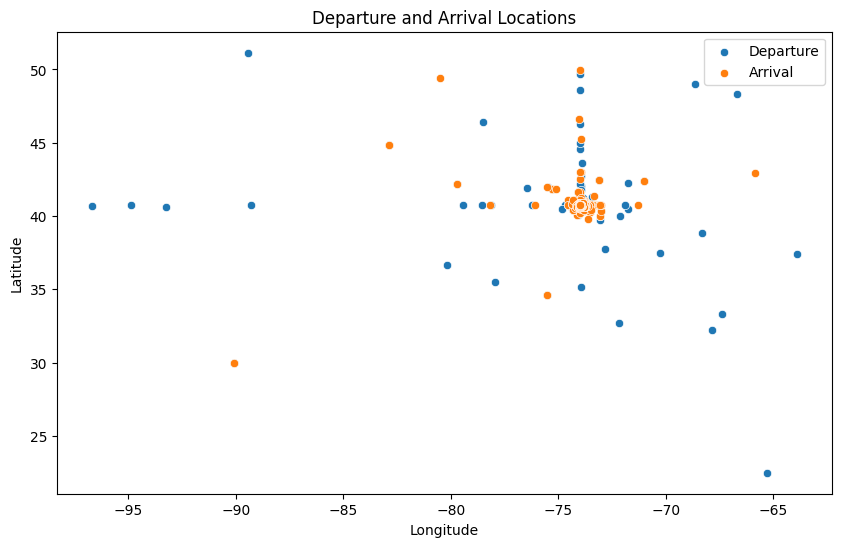

In [28]:
#Diagram 2 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=travelfee_train, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=travelfee_train, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [29]:
# Query 1. Query to find the most common departure hour:
travelfee_train['departure_hour'] = pd.to_datetime(travelfee_train['departure_time']).dt.hour
most_common_departure_hour = travelfee_train['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19


In [30]:
# Query 2: Average Travel Fee by Occupancy
average_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
1    11.203859
2    11.689538
3    11.546169
4    11.540536
5    11.430317
Name: travel_fee, dtype: float64


In [31]:
# Query 3: Average Travel Fee by Hour
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])
travelfee_train['hour'] = travelfee_train['departure_time'].dt.hour
average_fee_by_hour = travelfee_train.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0     12.006059
1     11.890799
2     11.955013
3     12.414264
4     13.300324
5     12.898596
6     10.758116
7     10.575456
8     11.041361
9     11.183568
10    11.194259
11    11.208566
12    11.404758
13    11.288478
14    11.442170
15    11.305746
16    11.254316
17    11.283054
18    10.960779
19    10.707507
20    10.820334
21    11.223487
22    11.413728
23    11.880920
Name: travel_fee, dtype: float64


# Modelling

### Model 1: Random Forest Regressor

In [32]:
#Predict fair price
#Model 1: Random Reofest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

forest_rmses = -cross_val_score(forest_reg, x1_train, y1_train,
                                scoring="neg_root_mean_squared_error",
                                cv=3)
forest_rmses

array([3.15701459, 3.14528856, 3.1358826 ])

In [33]:
pd.Series(forest_rmses).describe()

count    3.000000
mean     3.146062
std      0.010587
min      3.135883
25%      3.140586
50%      3.145289
75%      3.151152
max      3.157015
dtype: float64

In [34]:
from sklearn.model_selection import cross_validate
forest_rmses = cross_validate(forest_reg,
                              x1_train, y1_train,
                              scoring="neg_root_mean_squared_error",
                              cv=2,
                              return_train_score=True)

forest_rmses

{'fit_time': array([106.78410029, 105.50436425]),
 'score_time': array([17.20622134, 17.07405543]),
 'test_score': array([-3.15266412, -3.13232675]),
 'train_score': array([-1.24112296, -1.2659949 ])}

In [35]:
forest_reg.fit(x1_train, y1_train)
travelfee_predictions = forest_reg.predict(x1_train)
forest_rmse = mean_squared_error(y1_train,
                                 travelfee_predictions,
                                 squared=False)
forest_rmse

1.26417572619981

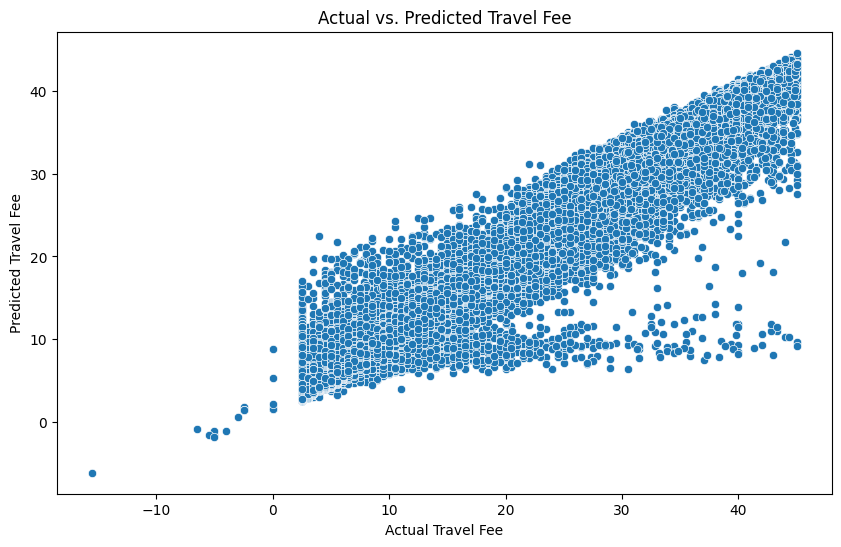

In [36]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y1_train, y=travelfee_predictions)
plt.xlabel('Actual Travel Fee')
plt.ylabel('Predicted Travel Fee')
plt.title('Actual vs. Predicted Travel Fee')
plt.show()

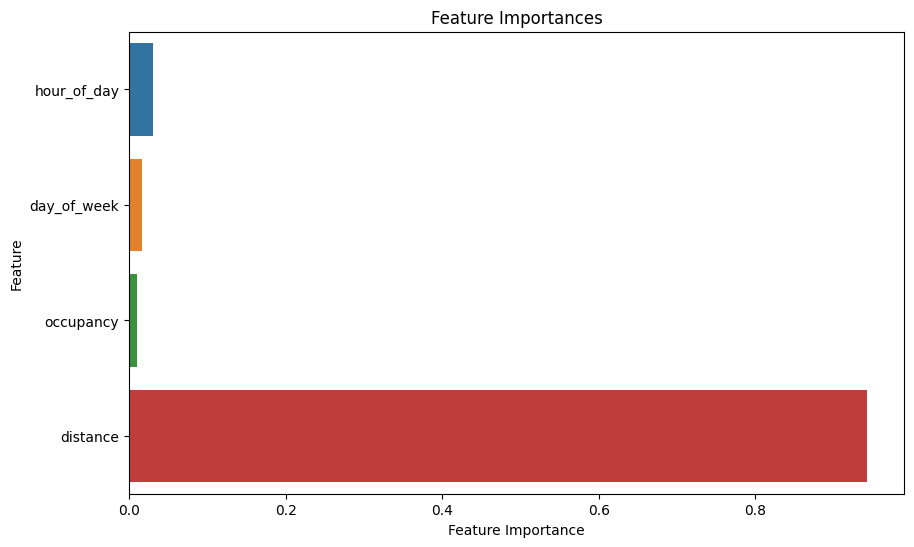

In [37]:
# Feature Importance Bar Plot:
# Get feature importances from the trained Random Forest model
feature_importances = forest_reg.named_steps['randomforestregressor'].feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=num_attribs)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

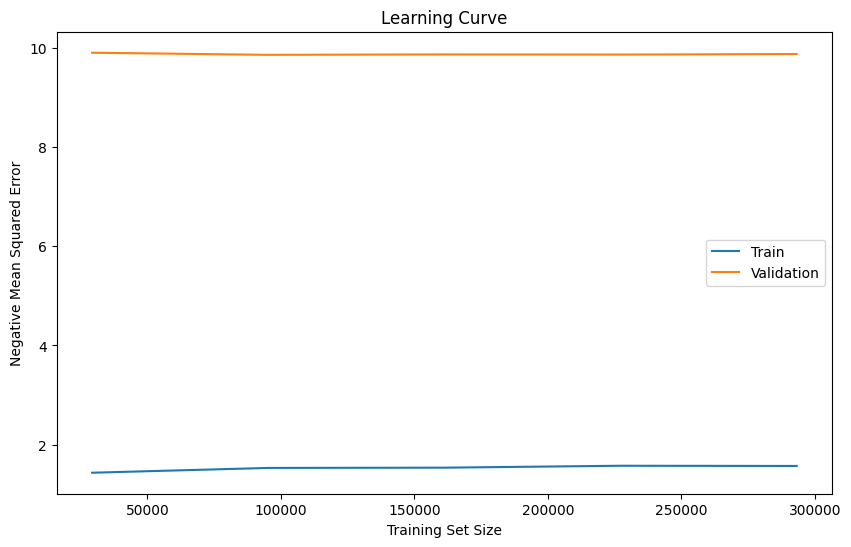

In [38]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest_reg, x1_train, y1_train, cv=2, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [39]:
# Create a DataFrame to display actual and predicted prices
result_df = pd.DataFrame({
    'Actual Price': y1_train,
    'Predicted Price': travelfee_predictions
})

# Display the first few rows of the DataFrame
print(result_df.head())

         Actual Price  Predicted Price
726742           11.0            9.200
1800257          10.5           10.675
2457038          13.0           12.000
172385           20.5           19.220
1538522           9.0            8.450


### Random Forest Regressor Fine Tuning

In [40]:
### Model 1: Random Forest Regressor

In [41]:
rf_regressor = RandomForestRegressor(random_state=42)
# Create a pipeline with preprocessing and random forest regressor
rf_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("rf_reg", rf_regressor),
])

# Define the parameter grid for hyperparameter tuning
param_distributions = [
    {'rf_reg__n_estimators': [100, 200, 300],
     'rf_reg__max_depth': [None, 10, 20],
     'rf_reg__min_samples_split': [2, 5, 10]}
]

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_full_pipeline, param_distributions, cv=2, scoring='neg_mean_squared_error')

# Assuming 'travelfee' is your feature data and 'travelfee_labels' are the target labels
grid_search_rf.fit(x1_train, y1_train)

# Calculate RMSE and standard deviation of RMSE for grid search
grid_rmse_scores = np.sqrt(-grid_search_rf.cv_results_['mean_test_score'])
grid_rmse_mean = np.mean(grid_rmse_scores)
grid_rmse_std = np.std(grid_rmse_scores)


# Print the results
print("Grid Search RMSE - Mean:", grid_rmse_mean)
print("Grid Search RMSE - Standard Deviation:", grid_rmse_std)
# Print best parameters
print("Tuned hyperparameters (best parameters):", grid_search_rf.best_params_)


Grid Search RMSE - Mean: 2.991831393863391
Grid Search RMSE - Standard Deviation: 0.07893711399968442
Tuned hyperparameters (best parameters): {'rf_reg__max_depth': 10, 'rf_reg__min_samples_split': 2, 'rf_reg__n_estimators': 300}


In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test set
y1_pred = best_rf_model.predict(x1_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

# Calculate RMSE scores for all cross-validation folds
grid_rmse_scores = np.sqrt(-grid_search_rf.cv_results_['mean_test_score'])

# Calculate mean RMSE
grid_rmse_mean = np.mean(grid_rmse_scores)

# Calculate standard deviation of RMSE
grid_rmse_std = np.std(grid_rmse_scores)

# Print the results
print("Test RMSE:", test_rmse)
print("Grid Search RMSE - Mean:", grid_rmse_mean)
print("Grid Search RMSE - Standard Deviation:",grid_rmse_std)


Test RMSE: 2.8885493309224035
Grid Search RMSE - Mean: 2.991831393863391
Grid Search RMSE - Standard Deviation: 0.07893711399968442


### Model 2: Ridge Refression

In [43]:
#Predict fair price
#Model 2: Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
# Create and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x1_train, y1_train)

Ridge()

In [45]:
ridge_score = cross_val_score(ridge_model, x1_train, y1_train, cv=5,verbose=2)
print("Ridge Score: ", ridge_score)
print(ridge_score.mean(),ridge_score.std())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
Ridge Score:  [ 0.16621334  0.07348805  0.15770313  0.10388917 -0.00429428]
0.09939988207698239 0.062140749095464236


### Ridge Regression Fine Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

In [47]:
# Define the hyperparameters grid
parameters = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}


In [48]:
# Create Ridge regression model
ridge_cv = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(x1_train, y1_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [49]:
# Get the best Ridge model
best_ridge = ridge_cv.best_estimator_

In [50]:
# Calculate RMSE for each fold and mean RMSE
mse_scores = -ridge_cv.cv_results_['mean_test_score']
rmse_scores = np.sqrt(mse_scores)

In [51]:
# Print best hyperparameters and evaluation metrics
print("Best Hyperparameters:", ridge_cv.best_params_)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Best Hyperparameters: {'alpha': 100}
Mean RMSE: 6.960575791854283
Standard Deviation of RMSE: 0.0030474283097092574


In [52]:
# Define the parameter grid for Ridge Regression
parameters = {
    'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform grid search with cross-validation for Ridge Regression
ridge_cv = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(x1_train, y1_train)

# Get the best Ridge model from grid search
best_ridge = ridge_cv.best_estimator_

# Predict on the test set
y1_pred_ridge = best_ridge.predict(x1_test)

# Calculate RMSE on the test set for Ridge Regression
test_rmse_ridge = np.sqrt(mean_squared_error(y1_test, y1_pred_ridge))

# Calculate mean squared error scores and RMSE scores for Ridge Regression
mse_scores_ridge = -ridge_cv.cv_results_['mean_test_score']
rmse_scores_ridge = np.sqrt(mse_scores_ridge)

# Calculate standard deviation of RMSE scores for Ridge Regression
rmse_std_ridge = np.std(rmse_scores_ridge)

# Print RMSE and standard deviation of RMSE for Ridge Regression
print("Ridge Regression Test RMSE:", test_rmse_ridge)
print("Ridge Regression Grid Search RMSE - Mean:", np.mean(rmse_scores_ridge))
print("Ridge Regression Grid Search RMSE - Standard Deviation:",rmse_std_ridge)

Ridge Regression Test RMSE: 7.059483266331728
Ridge Regression Grid Search RMSE - Mean: 6.9605624458635305
Ridge Regression Grid Search RMSE - Standard Deviation: 0.0030585548769790746


### Model 3: Lasso Regression

In [53]:
#Predict fair price
#Model 3: Lasso Regression

In [54]:
from sklearn.linear_model import Lasso

lasso_reg = make_pipeline(
    preprocessing,
    Lasso(alpha=0.01,random_state=42)

)

In [55]:
lasso_mse_scores = -cross_val_score(lasso_reg, x1_train, y1_train, scoring="neg_mean_squared_error", cv=5)
lasso_rmse_scores = np.sqrt(lasso_mse_scores)

In [56]:
lasso_mse = lasso_mse_scores.mean()

# Print MSE and RMSE scores
print("Lasso Regression Mean Squared Error (MSE):", lasso_mse)
print("Lasso Regression RMSE Scores:", lasso_rmse_scores)
print("Mean RMSE:", lasso_rmse_scores.mean())
print("Standard Deviation of RMSE:", lasso_rmse_scores.std())

Lasso Regression Mean Squared Error (MSE): 47.73220547980079
Lasso Regression RMSE Scores: [6.61822441 7.07681508 6.6503574  6.87871389 7.29622252]
Mean RMSE: 6.904066659826526
Standard Deviation of RMSE: 0.2570389785083039


### Lasso Regression Fine Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

In [58]:
# Define the hyperparameters grid
parameters = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

In [59]:
# Create lasso regression model
lasso_cv = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(x1_train, y1_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [60]:
# Get the best Ridge model
print("Best Parameters for Lasso Regression:", lasso_cv.best_params_)

Best Parameters for Lasso Regression: {'alpha': 0.04}


In [61]:
# Calculate RMSE for each fold and mean RMSE
mse_scores = -lasso_cv.cv_results_['mean_test_score']
rmse_scores = np.sqrt(mse_scores)

In [62]:
# Print best hyperparameters and evaluation metrics
print("Best Hyperparameters:", lasso_cv.best_params_)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Best Hyperparameters: {'alpha': 0.04}
Mean RMSE: 7.122761651382546
Standard Deviation of RMSE: 0.16583733955826468


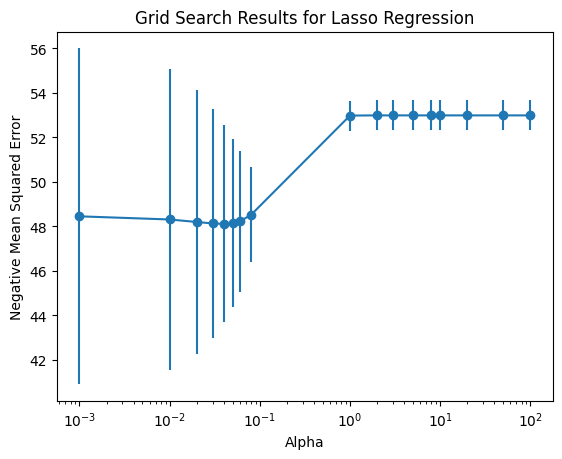

In [63]:
import matplotlib.pyplot as plt

# Extract the grid search results
results = lasso_cv.cv_results_
alphas = lasso_cv.param_grid['alpha']
neg_mse_means = -results['mean_test_score']
neg_mse_stds = results['std_test_score']

# Plot the mean negative MSE with error bars
plt.errorbar(alphas, neg_mse_means, yerr=neg_mse_stds, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Grid Search Results for Lasso Regression')
plt.xscale('log')  # Use a logarithmic scale for x-axis
plt.show()


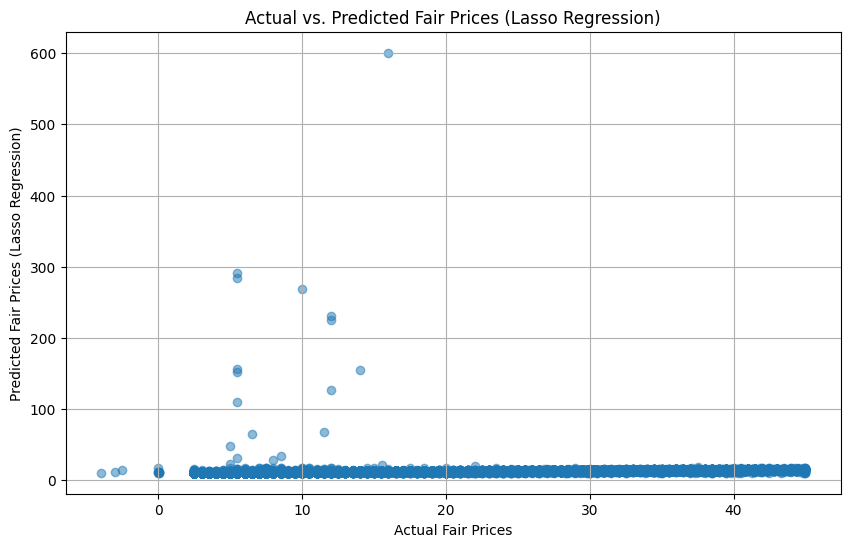

In [64]:
# Assuming lasso_cv is a fitted GridSearchCV object
lasso_model = lasso_cv.best_estimator_  # Get the best-fitted Lasso model from the GridSearchCV

# Assuming x1_test and y1_test are your test data
lasso_predicted_fair_prices = lasso_model.predict(x1_test)

# Plotting a graph to compare actual vs. predicted fair prices
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, lasso_predicted_fair_prices, alpha=0.5)
plt.xlabel('Actual Fair Prices')
plt.ylabel('Predicted Fair Prices (Lasso Regression)')
plt.title('Actual vs. Predicted Fair Prices (Lasso Regression)')
plt.grid(True)

In [65]:
# Define the parameter grid for Lasso Regression
parameters = {
    'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
}

# Perform grid search with cross-validation for Lasso Regression
lasso_cv = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(x1_train, y1_train)

# Get the best Lasso model from grid search
best_lasso = lasso_cv.best_estimator_

# Predict on the test set
y1_pred_lasso = best_lasso.predict(x1_test)

# Calculate RMSE on the test set for Lasso Regression
test_rmse_lasso = np.sqrt(mean_squared_error(y1_test, y1_pred_lasso))

# Calculate mean squared error scores and RMSE scores for Lasso Regression
mse_scores_lasso = -lasso_cv.cv_results_['mean_test_score']
rmse_scores_lasso = np.sqrt(mse_scores_lasso)

# Calculate standard deviation of RMSE scores for Lasso Regression
rmse_std_lasso = np.std(rmse_scores_lasso)

# Print RMSE and standard deviation of RMSE for Lasso Regression
print("Lasso Regression Test RMSE:", test_rmse_lasso)
print("Lasso Regression Grid Search RMSE - Mean:", np.mean(rmse_scores_lasso))
print("Lasso Regression Grid Search RMSE - Standard Deviation:",rmse_std_lasso)

Lasso Regression Test RMSE: 7.002221930286586
Lasso Regression Grid Search RMSE - Mean: 7.122761651382546
Lasso Regression Grid Search RMSE - Standard Deviation: 0.16583733955826468


### Model 4: Support Vector Regression

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm_notebook
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Choose a random subset of 10000 data points for training (to reduce the training time for this model)
random_indices = np.random.choice(len(x1_train), size=10000, replace=False)
x_subset_train = x1_train.iloc[random_indices]  # Use .iloc to index by positions
y_subset_train = y1_train.iloc[random_indices]

# Create the SVR model
svr_model = make_pipeline(
    preprocessing,
    SVR()  # Remove random_state parameter
)

# Evaluate the model using cross-validation
svr_rmses = -cross_val_score(svr_model, x_subset_train, y_subset_train,
                             scoring="neg_root_mean_squared_error",
                             cv=10)
print("Cross-Validation RMSEs:", svr_rmses)


Cross-Validation RMSEs: [3.12129192 3.09873726 2.82989115 3.03984056 3.14219595 3.18199644
 3.1067966  3.10858092 3.00119235 3.1095774 ]


In [67]:
# Fit the model on the subset of training data
svr_model.fit(x_subset_train, y_subset_train)

# Make predictions on the subset of training data
travelfee_predictions = svr_model.predict(x_subset_train)

# Calculate RMSE on the subset of training data
svr_rmse = mean_squared_error(y_subset_train,
                              travelfee_predictions,
                              squared=False)
print("Subset Training RMSE:", svr_rmse)

Subset Training RMSE: 3.032746282268521


### Support Vector Regression Fine Tuning

In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3, 0.4]
}

best_score = None
best_params = None

# Iterate through all combinations of hyperparameters
for kernel in param_grid['kernel']:
    for C in param_grid['C']:
        for epsilon in param_grid['epsilon']:
            svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
            scores = cross_val_score(svr, x_subset_train, y_subset_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(scores)

            # Check if the current combination is the best
            if best_score is None or avg_score < best_score:
                best_score = avg_score
                best_params = {'kernel': kernel, 'C': C, 'epsilon': epsilon}

# Get the best hyperparameters
best_kernel = best_params['kernel']
best_C = best_params['C']
best_epsilon = best_params['epsilon']

print("Best Kernel:", best_params['kernel'])
print("Best C:", best_params['C'])
print("Best Epsilon:", best_params['epsilon'])

# Create the best model using the best hyperparameters
best_model = SVR(kernel=best_kernel, C=best_C, epsilon=best_epsilon)

Best Kernel: poly
Best C: 0.1
Best Epsilon: 0.1


In [69]:
#Test again the tuned model
best_model.fit(x_subset_train, y_subset_train)
y_pred = best_model.predict(x1_test)
tuned_mse = mean_squared_error(y1_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(tuned_mse)

# Perform cross-validation to calculate RMSE for each fold
neg_mse_scores = cross_val_score(best_model, x_subset_train, y_subset_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)

# Calculate Mean RMSE and SD RMSE for cross-validation
mean_rmse_cv = rmse_scores.mean()
std_rmse_cv = rmse_scores.std()

print("Tuned Model Mean Squared Error:", tuned_mse)
print("Tuned Model RMSE:", rmse)
print("Mean RMSE (CV):", mean_rmse_cv)
print("SD RMSE (CV):",std_rmse_cv)

Tuned Model Mean Squared Error: 57.32927686277957
Tuned Model RMSE: 7.571609925424022
Mean RMSE (CV): 7.7189715122837
SD RMSE (CV): 0.23581053739646826


### Model 5：Decision Tree Regression

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
# Create a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

In [72]:
# Fit the Decision Tree model to your training data
decision_tree.fit(x1_train, y1_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [73]:
# Use the trained model to make predictions on your test dataset
y1_pred = decision_tree.predict(x1_train)

In [74]:
# Calculate RMSE on the training set
rmse_train = np.sqrt(mean_squared_error(y1_train, y1_pred))
print("RMSE on Training Set:", rmse_train)

# Now, calculate RMSE for multiple train-test splits to compute mean and SD RMSE
n_splits = 10  # You can adjust the number of splits as needed
rmse_scores_train = []

for _ in range(n_splits):
    x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x1_train, y1_train, test_size=0.2, random_state=None)
    decision_tree.fit(x_train_split, y_train_split)
    y_val_pred = decision_tree.predict(x_val_split)
    rmse_scores_train.append(np.sqrt(mean_squared_error(y_val_split, y_val_pred)))

mean_rmse_train = np.mean(rmse_scores_train)
sd_rmse_train = np.std(rmse_scores_train)
print("Mean RMSE on Training Set (Cross-Validation):", mean_rmse_train)
print("SD RMSE on Training Set (Cross-Validation):", sd_rmse_train)

RMSE on Training Set: 3.0205591349365943
Mean RMSE on Training Set (Cross-Validation): 3.034379310036423
SD RMSE on Training Set (Cross-Validation): 0.01745403037075855


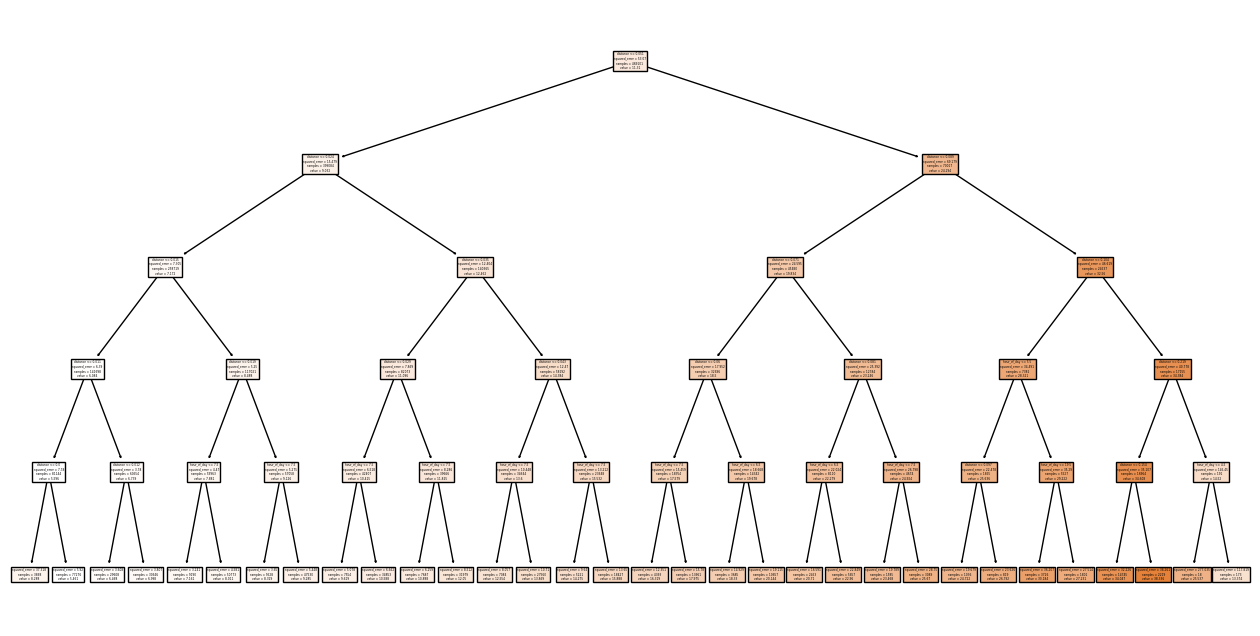

In [75]:
# Visualize the Decision Tree

num_feature_names = ['hour_of_day', 'day_of_week', 'occupancy', 'distance']

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(decision_tree, feature_names=num_feature_names, filled=True)
plt.show()

### Decistion Tree Regression Fine Tuning

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
# Create a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15, None],  # Vary the maximum depth
    'min_samples_split': [2, 5, 10],  # Vary the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Vary the minimum samples required at leaf nodes
}

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x1_train, y1_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_decision_tree = grid_search.best_estimator_

# Evaluate the best model on the test set
y1_pred = best_decision_tree.predict(x1_test)
r2 = r2_score(y1_test, y1_pred)

# Calculate the Mean Squared Error for the decision tree
tuned_mse_decision_tree = mean_squared_error(y1_test, y1_pred)

# Calculate RMSE for the decision tree
rmse_decision_tree = np.sqrt(tuned_mse_decision_tree)

print("R Square:", r2)
print("Tuned Decision Tree Mean Squared Error:", tuned_mse_decision_tree)
print("Tuned Decision Tree RMSE:", rmse_decision_tree)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
R Square: 0.8397255694012454
Tuned Decision Tree Mean Squared Error: 8.461639138143468
Tuned Decision Tree RMSE: 2.90888967445372
